In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from collections import defaultdict

import pycountry as pyc

import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer, normalize

%matplotlib inline
rcParams['figure.figsize'] = 12, 18

In [2]:
emails = pd.read_csv("hillary-clinton-emails/Emails.csv")

First we need to prepare our data for analysis. The goal of this task to analyse Hillary Clinton's opinion about different countries. For the dataset we will take only messages sent by her and will use only ExtractedBodyText column to exclude the influence of forwarded and copied messages.

In [3]:
persons = pd.read_csv("hillary-clinton-emails/Persons.csv")

In [4]:
hillaryid = persons[persons.Name == "Hillary Clinton"].Id.values

In [5]:
hilaryemails = emails[emails.SenderPersonId == hillaryid[0]]['ExtractedBodyText'].dropna().copy()

In [6]:
sentim_analyzer = SentimentIntensityAnalyzer()

Our approach will consist of several steps:
    1. Go through all emails and return compound score using SentimentIntensityAnalyzer.
    2. check appearance of each country name in normal, upper and lower case. We also check occurence of alpha_3 codes. We don't use alpha_2 as it will be too ambigous, examples: FM for 'Micronesia, Federated States of', NO for 'Norway', ID for 'Indonesia' etc. Plus two latters codes have some intersections with USA states.
    3. Perform adhoc checks for several countries.
    4. Count number of emails where particular country has occured.

In [25]:
def sentimentEmailAnalysis():
    countrysentiment = defaultdict(lambda: 0)
    countrycount = defaultdict(lambda: 0)
    
    for row in hilaryemails.iteritems():
        emailtext = row[1]
        score = sentim_analyzer.polarity_scores(emailtext)['compound']

        for key in pyc.countries.indices.get('name').keys():
            if (key in emailtext) or (key.lower() in emailtext) or (key.upper() in emailtext) or \
            (' '+pyc.countries.indices.get('name')[key].alpha_3+' ' in emailtext):
    #         (' '+pyc.countries.indices.get('name')[key].alpha_2+' ' in row.ExtractedBodyText) or \
                countrysentiment[key] += score
                countrycount[key] += 1

            if key == 'Korea, Republic of':
                country = 'South Korea'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'Syrian Arab Republic':
                country = 'Syria'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'Korea, Democratic People\'s Republic of':
                country = 'North Korea'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'Palestine, State of\'s Republic of':
                country = 'Palestine'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'United Kingdom':
                country1, country2 = 'UK', 'England'
                if (country1 in emailtext) or \
                (country1.upper() in emailtext) or \
                (country2 in emailtext) or \
                (country2.upper() in emailtext) or \
                (country2.lower() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'Russian Federation':
                country = 'Russia'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'Moldova, Republic of':
                country = 'Moldova'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'United States':
                country = 'USA'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

            if key == 'Taiwan, Province of China':
                country = 'Taiwan'
                if (country in emailtext) or \
                (country.lower() in emailtext) or \
                (country.upper() in emailtext):
                    countrysentiment[key] += score
                    countrycount[key] += 1

        if (' EU ' in emailtext):
            countrysentiment['EU'] += score
            countrycount['EU'] += 1
        
    tmp1 = pd.DataFrame.from_dict(countrysentiment, orient='index', )
    tmp2 = pd.DataFrame.from_dict(countrycount, orient='index')
    return pd.concat([tmp1, tmp2], axis=1)

Now we can display the polarity scores sorting them from negative to positive.

In [26]:
df = sentimentEmailAnalysis()
df.columns=['Sentiment','Freq']
df.sort_values(['Sentiment'],ascending=True, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

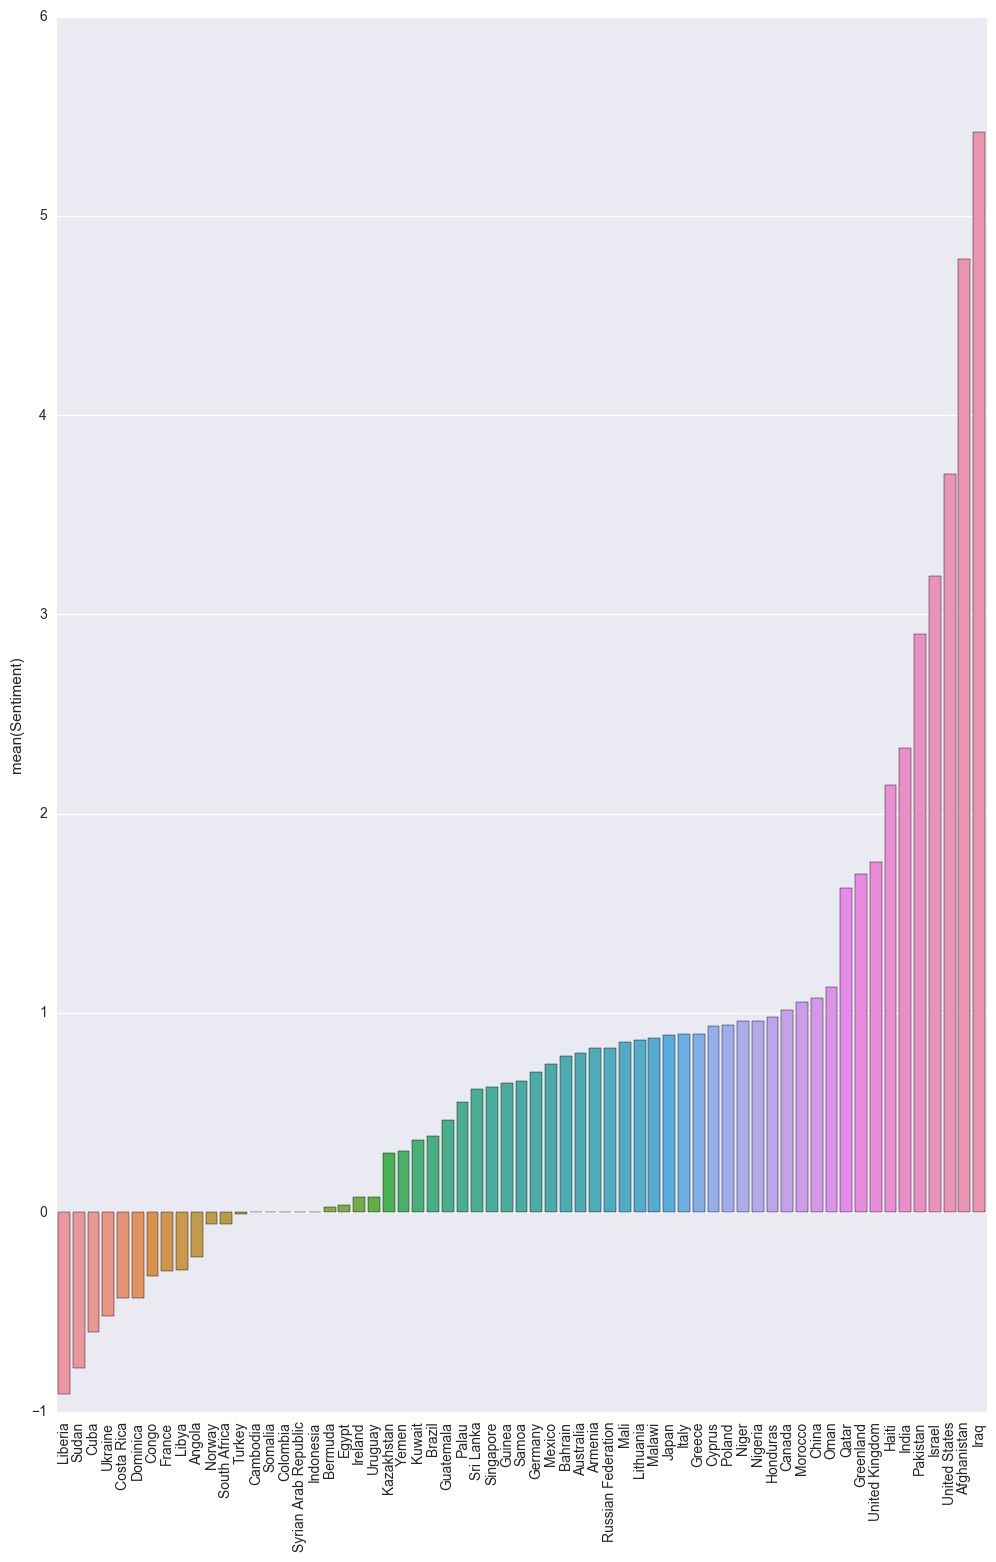

In [27]:
sns.barplot(x=df.index, y=df.Sentiment, data=df)
plt.xticks(rotation=90)

We could display the same scores but normilized by occurence of each country in emails to decrease the bayes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

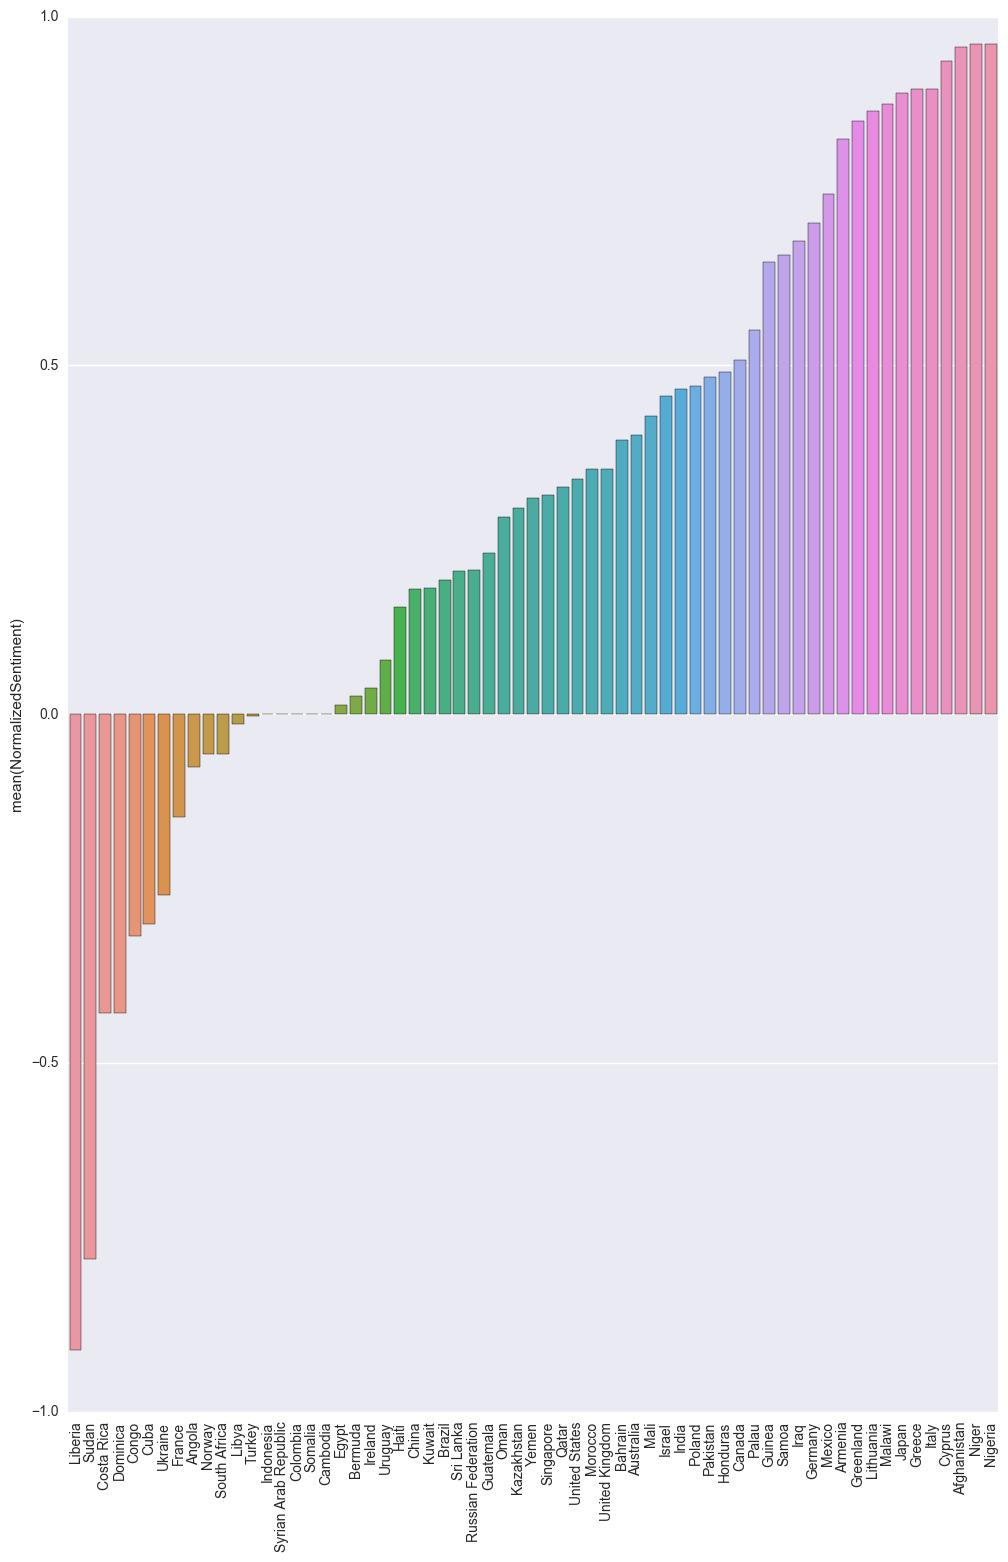

In [28]:
df['NormalizedSentiment']=df['Sentiment']/df['Freq']
df.sort_values(['NormalizedSentiment'],ascending=True, inplace=True)
sns.barplot(x=df.index, y=df.NormalizedSentiment, data=df)
plt.xticks(rotation=90)